.

Deep_Learning_Studynotes_TIL(20190713)

#### study program : https://www.fastcampus.co.kr/data_camp_deeplearning

#### 1. 개요

TF 2ver 및 mnist 이미지를 이용하여 4가지 방법으로 CNN 구현

#### 2. 목차

방법 1) Sequential API를 이용한 구현

방법 2) Functional API를 사용한 구현

방법 3) Python subclassing으로 구현

방법 4) only Keras의 Sequential API로 구현 --> 네트워크가 복잡해질수록 초보자들이 구현하기 가장 무난한 방법

#### 방법 1) Sequential API를 이용한 구현

1) Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.2.0-rc3
2.3.0-tf


2) Enable Eager Mode

In [0]:
if tf.__version__ < '2.0.0':
    tf.enable_eager_execution()

3) Hyper Parameters

In [0]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_class = 10

4) MNIST/Fashion MNIST Data

In [0]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

5) Datasets

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [7]:
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

In [13]:
print(train_images.shape)

n_train = train_images.shape[0]
print(n_train)
n_test = test_images.shape[0]
print(n_test)

(60000, 28, 28)
60000
10000


In [0]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# 이미지의 shape가 (60000,28,28)이기 때문에 이것을 4차원으로 바꿔줘야 CNN에 들어갈 수 있을것이다.
# fully connected layer(즉 MLP)에서는 3차원의 (60000,28,28)를 flatten해서 2차원 (60000, 784)로 바꿨다. 
# 그러나 이제는 CNN에 넣어야 하니까 4차원으로 바꿔야 하는데 (60000,28,28,[채널수])가 되야 한다.
# 그래서 아래줄의 코드와 같이 CNN에 입력으로 넣기 위해 3차원->4차원으로 변경(channel에 1(흑백이기 때문에)을 추가)한 것이다.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

6) Model Function

In [0]:
# Sequential API를 사용하여 model 구성
# 일반적으로 가로세로를 절반으로 줄일때마다 채널을 두배로 증가시켜준다.
# 아래 코드와 같이 풀링을 쓸때마다 가로세로 절반이 줄기 때문에 그때마다 필터의 수를 두배로 늘려주었다.
# 채널을 늘리는 이유는 점점 더 하이레벨 피쳐를 가지고 있어야 하니까 그 갯수는 점점 더 늘어나야 한다.
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [16]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

7) Loss Function

In [0]:
@tf.function
def loss_fn(model, images, labels):
    predictions = model(images, training=True)
    loss = tf.reduce_mean(keras.losses.categorical_crossentropy(labels, predictions))   
    return loss  

8) Calculating Gradient & Updating Weights

In [0]:
@tf.function
def train(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

9) Caculating Model's Accuracy

In [0]:
@tf.function
def evaluate(model, images, labels):
    predictions = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    
    return accuracy

10) Optimizer

In [0]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

11) Training

In [21]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0
    
    for images, labels in train_dataset:
        train(model,images, labels)
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))


print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.19811656 train accuracy =  0.9518 test accuracy =  0.9866
Epoch: 2 loss = 0.05068642 train accuracy =  0.9896 test accuracy =  0.9901
Epoch: 3 loss = 0.03454998 train accuracy =  0.9929 test accuracy =  0.9904
Epoch: 4 loss = 0.02542608 train accuracy =  0.9950 test accuracy =  0.9913
Epoch: 5 loss = 0.02079372 train accuracy =  0.9964 test accuracy =  0.9931
Epoch: 6 loss = 0.01775130 train accuracy =  0.9966 test accuracy =  0.9926
Epoch: 7 loss = 0.01463069 train accuracy =  0.9974 test accuracy =  0.9926
Epoch: 8 loss = 0.01185772 train accuracy =  0.9981 test accuracy =  0.9926
Epoch: 9 loss = 0.01114027 train accuracy =  0.9983 test accuracy =  0.9937
Epoch: 10 loss = 0.00784650 train accuracy =  0.9988 test accuracy =  0.9924
Epoch: 11 loss = 0.00660648 train accuracy =  0.9992 test accuracy =  0.9928
Epoch: 12 loss = 0.00727416 train accuracy =  0.9992 test accuracy =  0.9907
Epoch: 13 loss = 0.00571463 train accuracy =  0.

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[:,:,0],cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

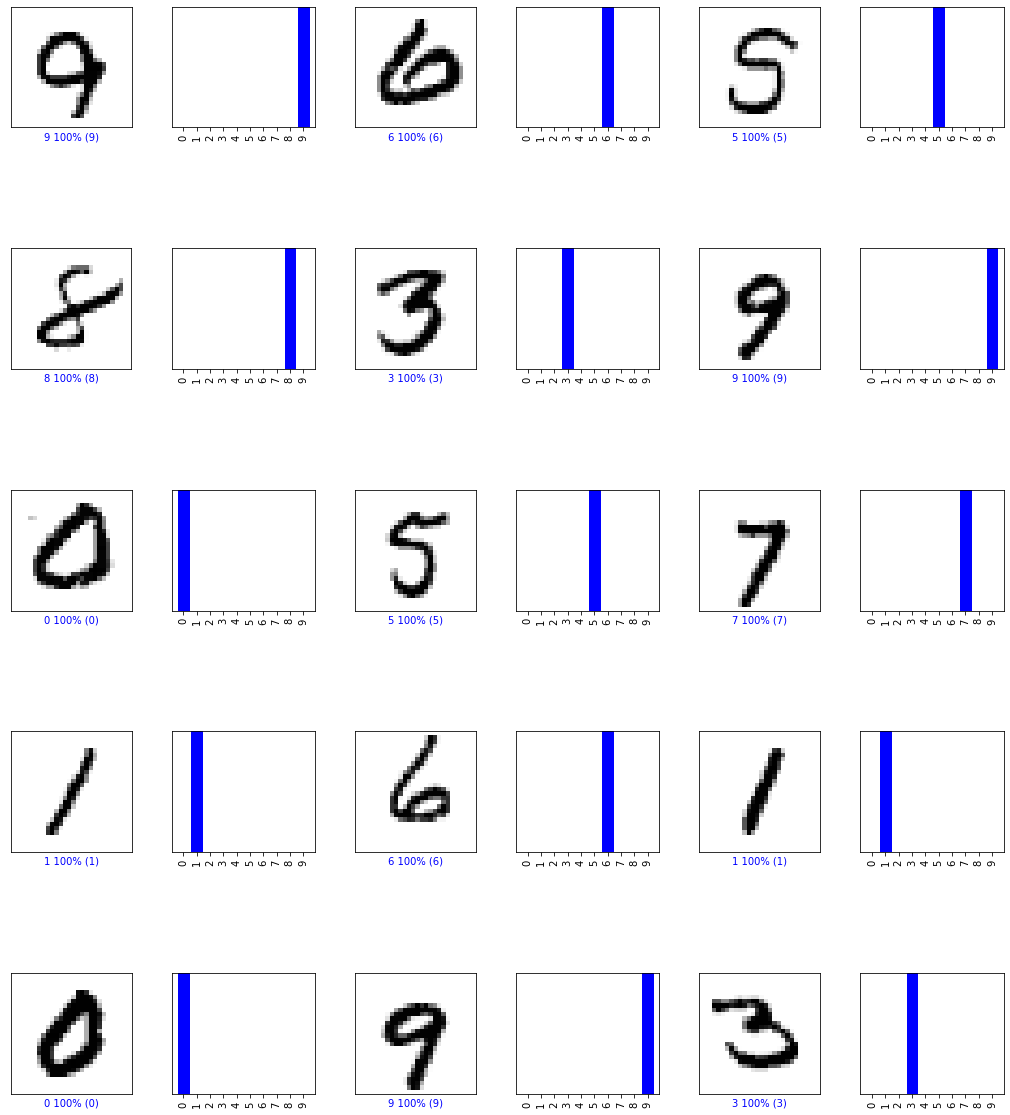

In [23]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

12) Creating a Checkpoint Directory

In [0]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_seq'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

13) Saving Weights

In [0]:
model.save_weights(checkpoint_prefix)

14) Calculating Average Accuracy

In [0]:
def avg_accuracy(model, dataset):
    avg_acc = 0.
    step = 0
    for images, labels in dataset:        
        predictions = model(images, training=False)
        correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
        acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))     
        avg_acc += acc
        step += 1    
    avg_acc = avg_acc / step
    return avg_acc.numpy()

15) Creating a New Model

In [0]:
new_model = create_model()

16) Test Accuracy before Restore

In [28]:
avg_accuracy(new_model, test_dataset)

0.07040003

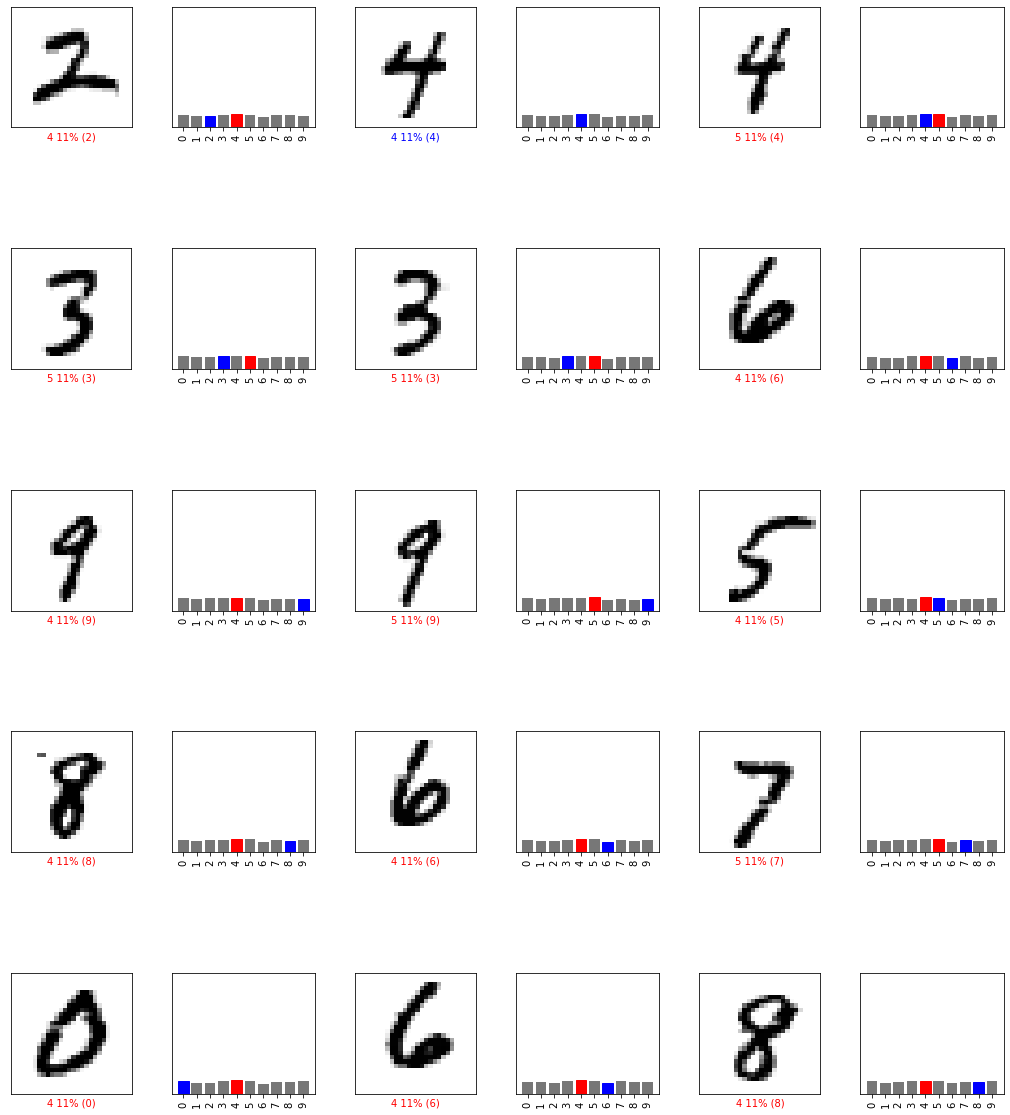

In [29]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

17) Restore Weights

In [30]:
new_model.load_weights(checkpoint_prefix)

18) Test Accuracy after Restore

In [31]:
avg_accuracy(new_model, test_dataset)

0.9931

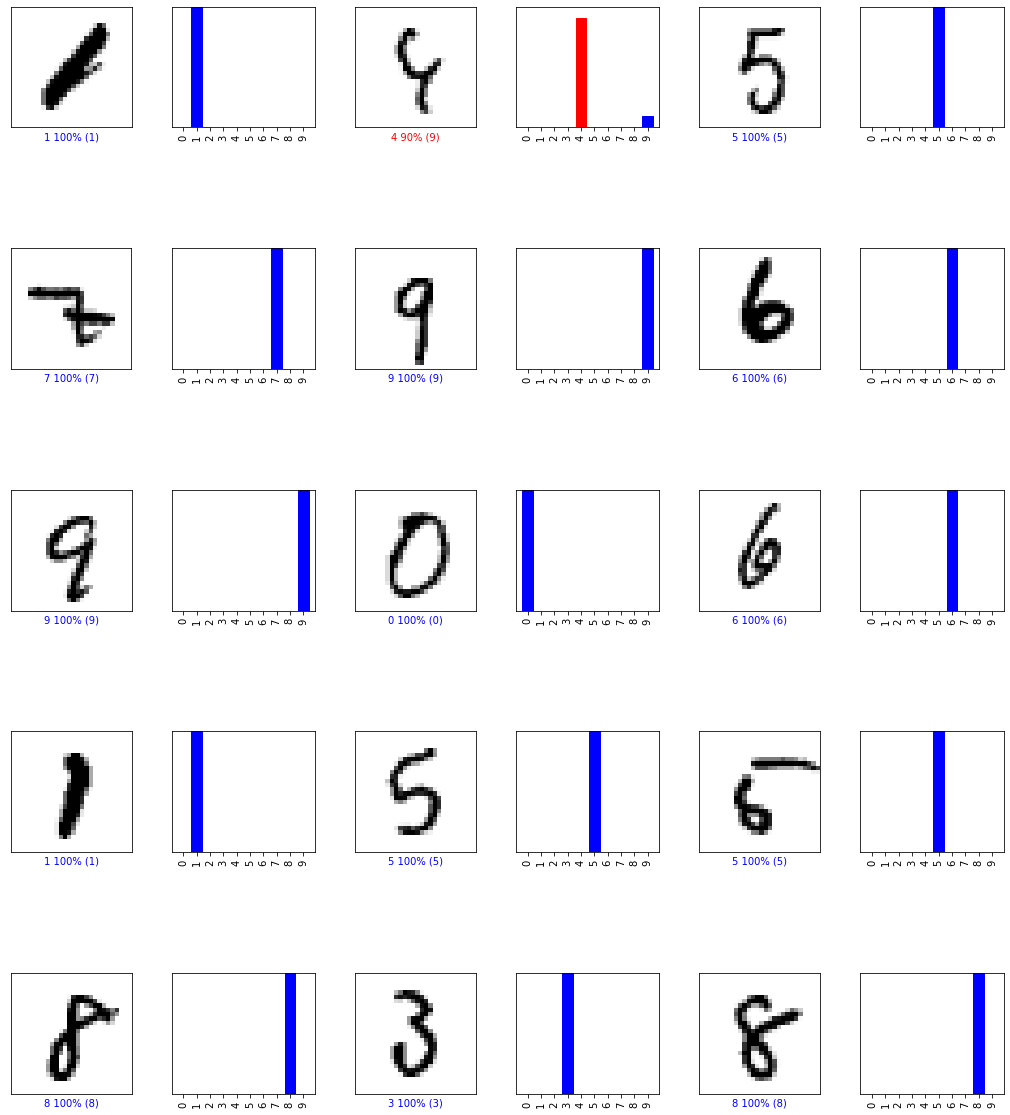

In [32]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

19) Save the Entire Model


19-1) Using HDF5

In [33]:
save_dir_name = 'saved_models'
os.makedirs(save_dir_name, exist_ok=True)
saved_model_path = os.path.join(cur_dir, save_dir_name, 'my_model.h5')
saved_model_path

'/content/saved_models/my_model.h5'

In [0]:
model.save(saved_model_path)

19-2) Using saved_model

In [0]:
saved_model_path = os.path.join(cur_dir, save_dir_name, 'my_saved_model')

keras.experimental.export_saved_model(model, saved_model_path)
saved_model_path

#### 방법 2) Functional API를 사용한 구현

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.2.0-rc3
2.3.0-tf


## Enable Eager Mode

In [0]:
if tf.__version__ < '2.0.0':
    tf.enable_eager_execution()

## Hyper Parameters

In [0]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_class = 10

## MNIST/Fashion MNIST Data

In [0]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Datasets

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
n_train = train_images.shape[0]
n_test = test_images.shape[0]

In [0]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
# CNN에 입력으로 넣기 위해 3차원->4차원으로 변경(channel에 1을 추가)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

## Model Function

In [0]:
# Functional API를 사용하여 model 구성
# Functional API는 api를 function처럼 사용하기 때문에 input 레이어를 반드시 넣어줘야 한다.
# 아래와 같이 inception 구조를 시퀀셜 API로 만들수 없다.
# input을 여러군대에서 갖다 써야하거나 output이 두개이상 나와야 하는 경우 Functional API를 써야한다.

# 거의 모든 keras api는 파이썬 class로 되어있다. 파이썬 class에는 __init__ 메서드가 있어서
# 최초에 클래스를 선언할때 initialization을 시켜주는 부분이 있고, call 메서드로 돌아가서
# 입력으로 들어가면 그 call 메서드에 정의된 대로 작동된다.
# 이런 원리를 잘모르면 레이어를 선언한 다음에 뒤에 괄호로 input값을 써줘야한다.


def create_model():
    inputs = keras.Input(shape=(28, 28, 1))
    conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation='relu')(inputs)
    pool1 = keras.layers.MaxPool2D(padding='SAME')(conv1)
    conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation='relu')(pool1)
    pool2 = keras.layers.MaxPool2D(padding='SAME')(conv2)
    conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation='relu')(pool2)
    pool3 = keras.layers.MaxPool2D(padding='SAME')(conv3)
    pool3_flat = keras.layers.Flatten()(pool3)
    dense4 = keras.layers.Dense(units=256, activation='relu')(pool3_flat)
    drop4 = keras.layers.Dropout(rate=0.4)(dense4)
    logits = keras.layers.Dense(units=10, activation='softmax')(drop4)
    return keras.Model(inputs=inputs, outputs=logits)

In [9]:
model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0     

## Loss Function

In [0]:
@tf.function
def loss_fn(model, images, labels):
    predictions = model(images, training=True)
    loss = tf.reduce_mean(keras.losses.categorical_crossentropy(labels, predictions))   
    return loss  

## Calculating Gradient & Updating Weights

In [0]:
@tf.function
def train(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

## Caculating Model's Accuracy

In [0]:
@tf.function
def evaluate(model, images, labels):
    predictions = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    
    return accuracy

## Optimizer

In [0]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

## Training

In [14]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0
    
    for images, labels in train_dataset:
        train(model,images, labels)
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))


print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.17637403 train accuracy =  0.9561 test accuracy =  0.9865
Epoch: 2 loss = 0.04731190 train accuracy =  0.9896 test accuracy =  0.9895
Epoch: 3 loss = 0.03140485 train accuracy =  0.9935 test accuracy =  0.9913
Epoch: 4 loss = 0.02441378 train accuracy =  0.9951 test accuracy =  0.9923
Epoch: 5 loss = 0.01802058 train accuracy =  0.9967 test accuracy =  0.9918
Epoch: 6 loss = 0.01586145 train accuracy =  0.9970 test accuracy =  0.9928
Epoch: 7 loss = 0.01255885 train accuracy =  0.9977 test accuracy =  0.9904
Epoch: 8 loss = 0.01178950 train accuracy =  0.9981 test accuracy =  0.9912
Epoch: 9 loss = 0.00954020 train accuracy =  0.9986 test accuracy =  0.9924
Epoch: 10 loss = 0.00850106 train accuracy =  0.9989 test accuracy =  0.9925
Epoch: 11 loss = 0.00642205 train accuracy =  0.9991 test accuracy =  0.9922
Epoch: 12 loss = 0.00651755 train accuracy =  0.9992 test accuracy =  0.9923
Epoch: 13 loss = 0.00597062 train accuracy =  0.

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[:,:,0],cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

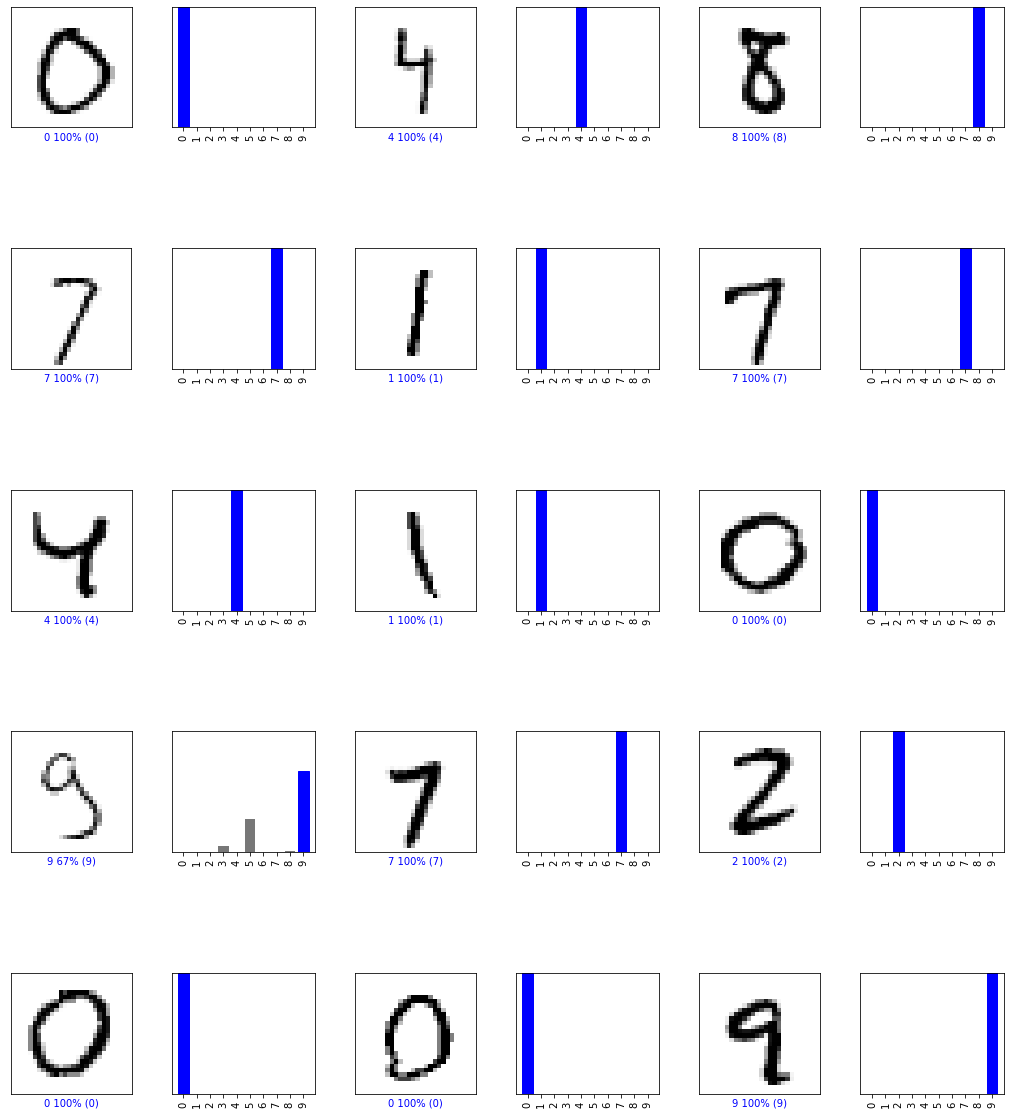

In [16]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Creating a Checkpoint Directory

In [0]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_func'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

# Saving Weights

In [0]:
model.save_weights(checkpoint_prefix)

# Calculating Average Accuracy

In [0]:
def avg_accuracy(model, dataset):
    avg_acc = 0.
    step = 0
    for images, labels in dataset:        
        predictions = model(images, training=False)
        correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
        acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))     
        avg_acc += acc
        step += 1    
    avg_acc = avg_acc / step
    return avg_acc.numpy()

# Creating a New Model

In [0]:
new_model = create_model()

# Test Accuracy before Restore

In [21]:
avg_accuracy(new_model, test_dataset)

0.0685

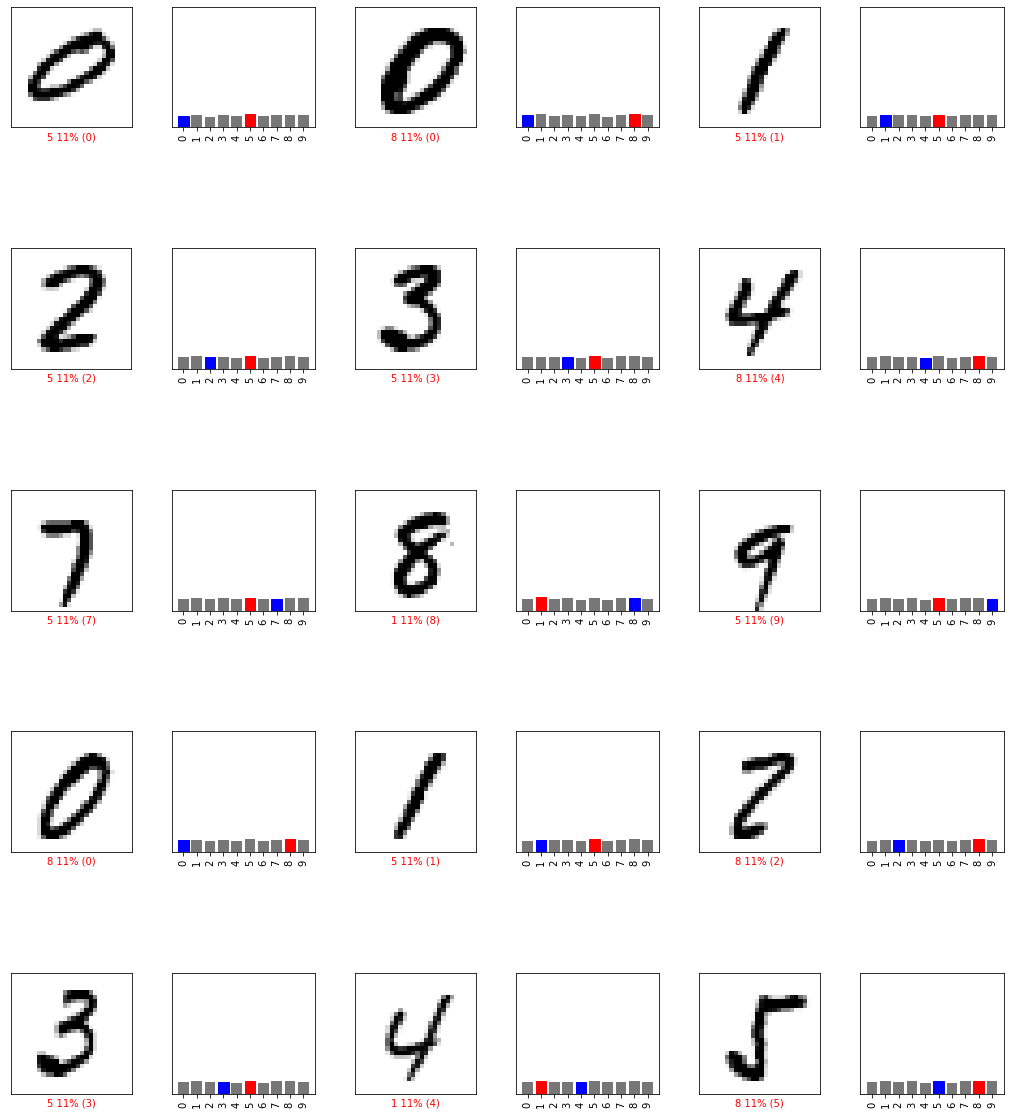

In [22]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Restore Weights

In [23]:
new_model.load_weights(checkpoint_prefix)

# Test Accuracy after Restore

In [24]:
avg_accuracy(new_model, test_dataset)

0.9932

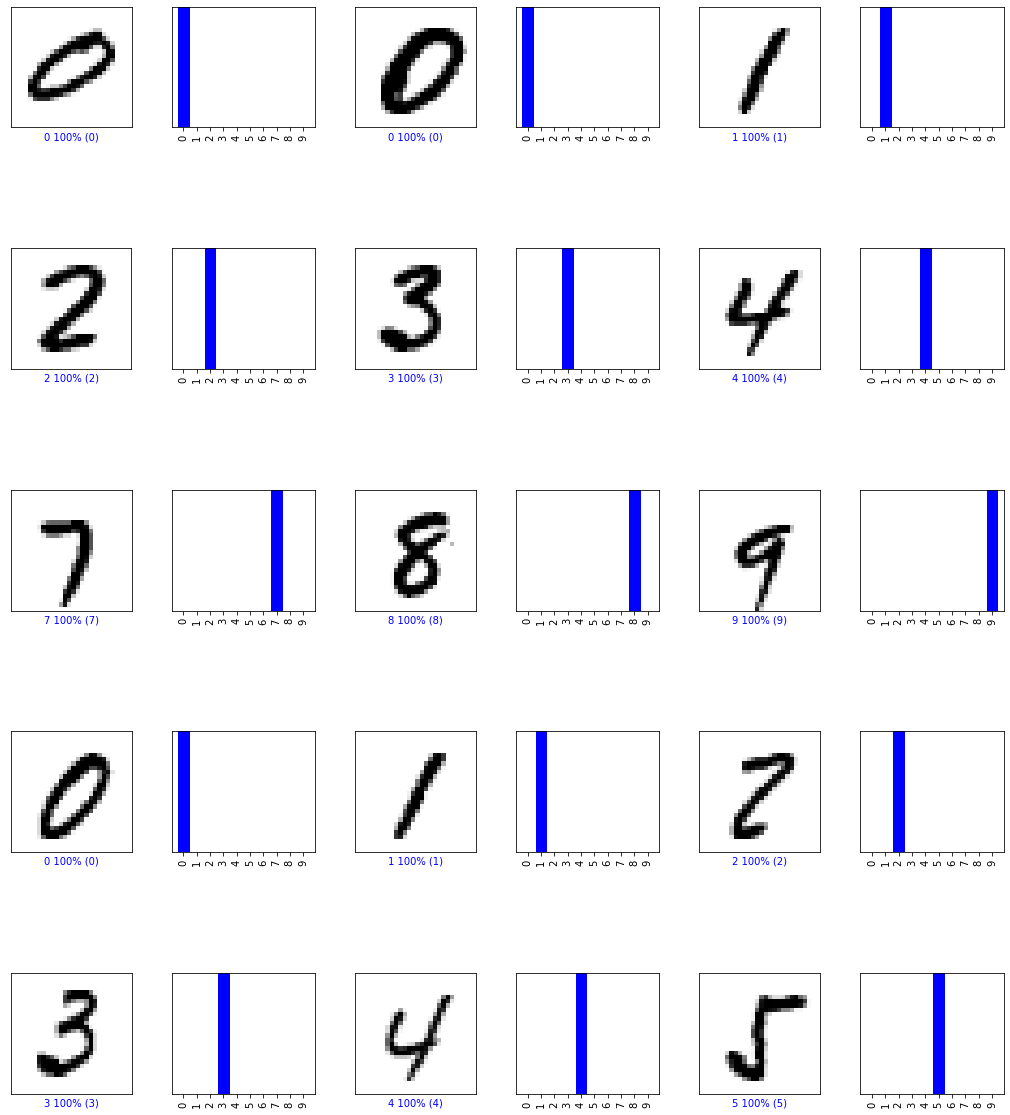

In [25]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

#### 방법 3) Python subclassing으로 구현

## Importing Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.2.0-rc3
2.3.0-tf


## Enable Eager Mode

In [0]:
if tf.__version__ < '2.0.0':
    tf.enable_eager_execution()

## Hyper Parameters

In [0]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_class = 10

## MNIST/Fashion MNIST Data

In [0]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Datasets

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
n_train = train_images.shape[0]
n_test = test_images.shape[0]

In [0]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
# CNN에 입력으로 넣기 위해 3차원->4차원으로 변경(channel에 1을 추가)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

## Model Class

In [0]:
# init 메소드가 있는것을 수동으로 구현하는 방식이다.
# 만들고자 하는 클래스를 정의하고 괄호에 tf.keras.Model이라는 클래스를 상속받는다.
# 그리고 super(MNISTModel, self).__init__()를 통해서 상위에 있는 init 메서드를 
# 한번 콜해줘야 한다. 그 다음에 벽돌쌓듯이 만들어주면 된다. 
# 레이어별로 input이 뒤에 없는데 이는 call 메서드로 밑에 구현이 되어 있는 것이다.
# __init__, __call__과 같이 언더바 언더바가 있는 것은 파이썬의 내장메서드이다.

class MNISTModel(tf.keras.Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation='relu')
        self.pool1 = keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation='relu')
        self.pool2 = keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation='relu')
        self.pool3 = keras.layers.MaxPool2D(padding='SAME')
        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = keras.layers.Dense(units=256, activation='relu')
        self.drop4 = keras.layers.Dropout(rate=0.4)
        self.dense5 = keras.layers.Dense(units=10, activation='softmax')
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)
        return net

In [11]:
model = MNISTModel()
temp_inputs = keras.Input(shape=(28, 28, 1))
model(temp_inputs)
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              

## Loss Function

In [0]:
@tf.function
def loss_fn(model, images, labels):
    predictions = model(images, training=True)
    loss = tf.reduce_mean(keras.losses.categorical_crossentropy(labels, predictions))   
    return loss  

## Calculating Gradient & Updating Weights

In [0]:
@tf.function
def train(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

## Caculating Model's Accuracy

In [0]:
@tf.function
def evaluate(model, images, labels):
    predictions = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    
    return accuracy

## Optimizer

In [0]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

## Training

In [16]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0
    
    for images, labels in train_dataset:
        train(model,images, labels)
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))


print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.18278919 train accuracy =  0.9543 test accuracy =  0.9850
Epoch: 2 loss = 0.04692856 train accuracy =  0.9896 test accuracy =  0.9901
Epoch: 3 loss = 0.03215206 train accuracy =  0.9930 test accuracy =  0.9913
Epoch: 4 loss = 0.02390871 train accuracy =  0.9955 test accuracy =  0.9875
Epoch: 5 loss = 0.01979880 train accuracy =  0.9964 test accuracy =  0.9919
Epoch: 6 loss = 0.01443451 train accuracy =  0.9975 test accuracy =  0.9914
Epoch: 7 loss = 0.01353403 train accuracy =  0.9978 test accuracy =  0.9928
Epoch: 8 loss = 0.01041251 train accuracy =  0.9981 test accuracy =  0.9938
Epoch: 9 loss = 0.00879372 train accuracy =  0.9988 test accuracy =  0.9926
Epoch: 10 loss = 0.00796625 train accuracy =  0.9991 test accuracy =  0.9921
Epoch: 11 loss = 0.00644126 train accuracy =  0.9992 test accuracy =  0.9927
Epoch: 12 loss = 0.00714967 train accuracy =  0.9991 test accuracy =  0.9932
Epoch: 13 loss = 0.00539113 train accuracy =  0.

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[:,:,0],cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

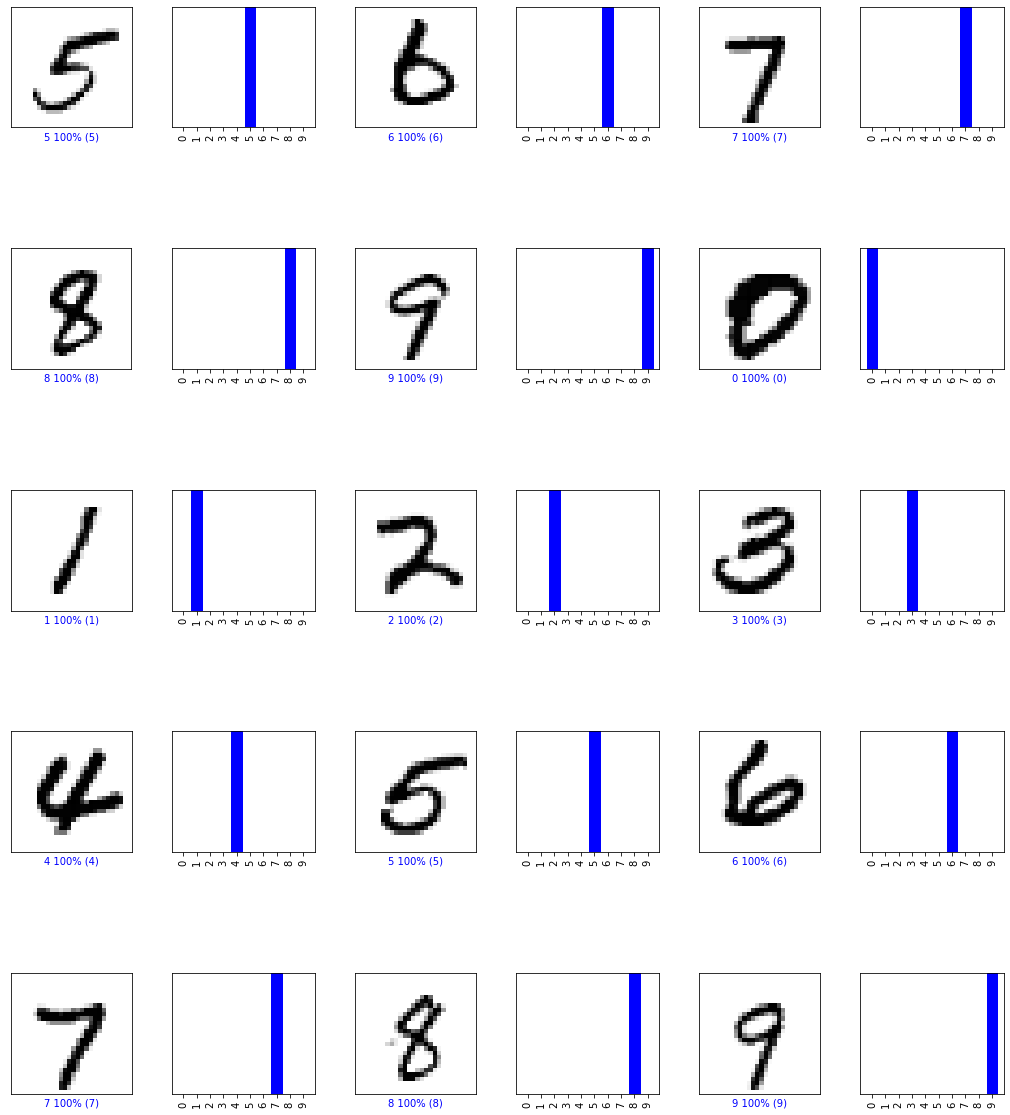

In [18]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Creating a Checkpoint Directory

In [0]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_subclass'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

# Saving Weights

In [0]:
model.save_weights(checkpoint_prefix)

# Calculating Average Accuracy

In [0]:
def avg_accuracy(model, dataset):
    avg_acc = 0.
    step = 0
    for images, labels in dataset:        
        predictions = model(images, training=False)
        correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
        acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))     
        avg_acc += acc
        step += 1    
    avg_acc = avg_acc / step
    return avg_acc.numpy()

# Creating a New Model

In [0]:
new_model = MNISTModel()

# Test Accuracy before Restore

In [23]:
avg_accuracy(new_model, test_dataset)

0.061299995

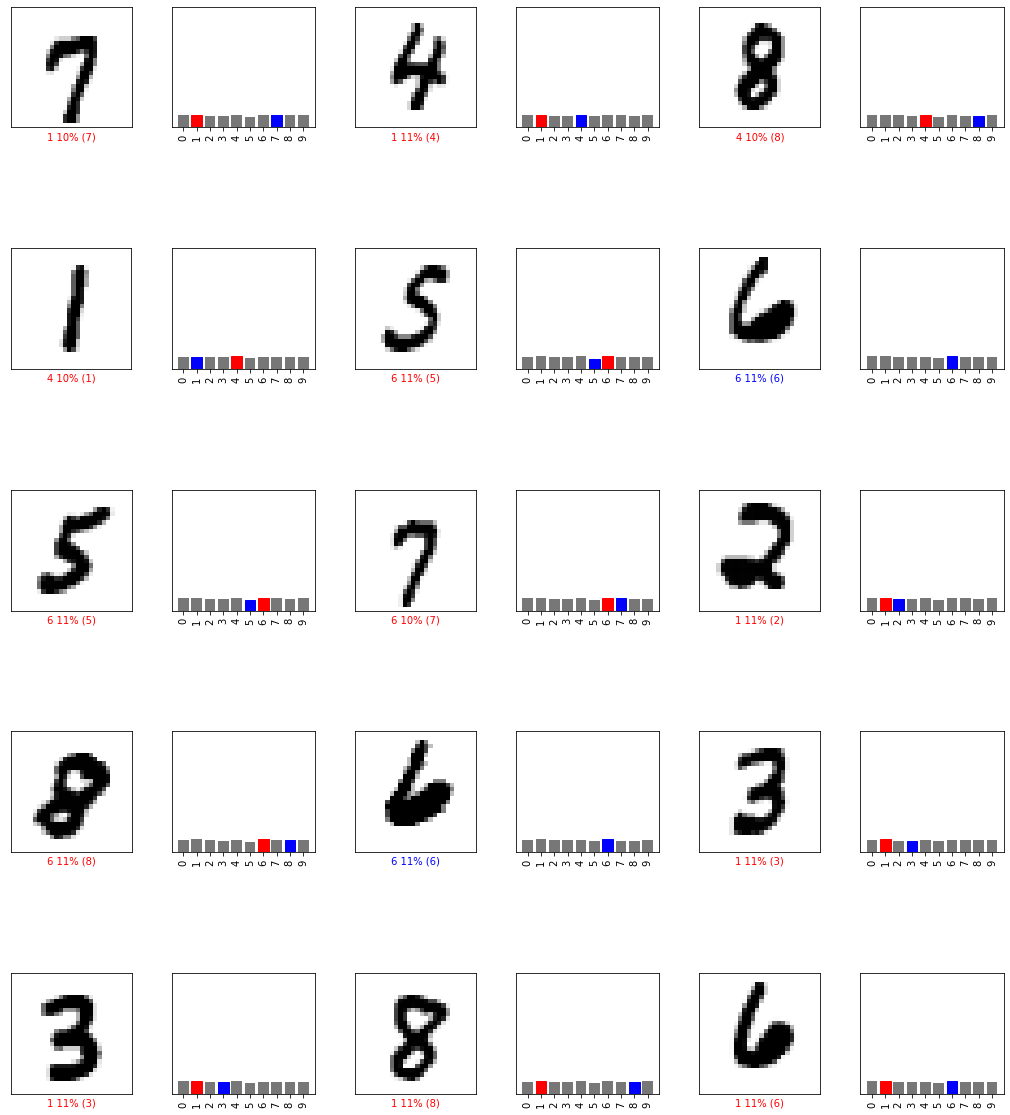

In [24]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Restore Weights

In [25]:
new_model.load_weights(checkpoint_prefix)

# Test Accuracy after Restore

In [26]:
avg_accuracy(new_model, test_dataset)

0.9934001

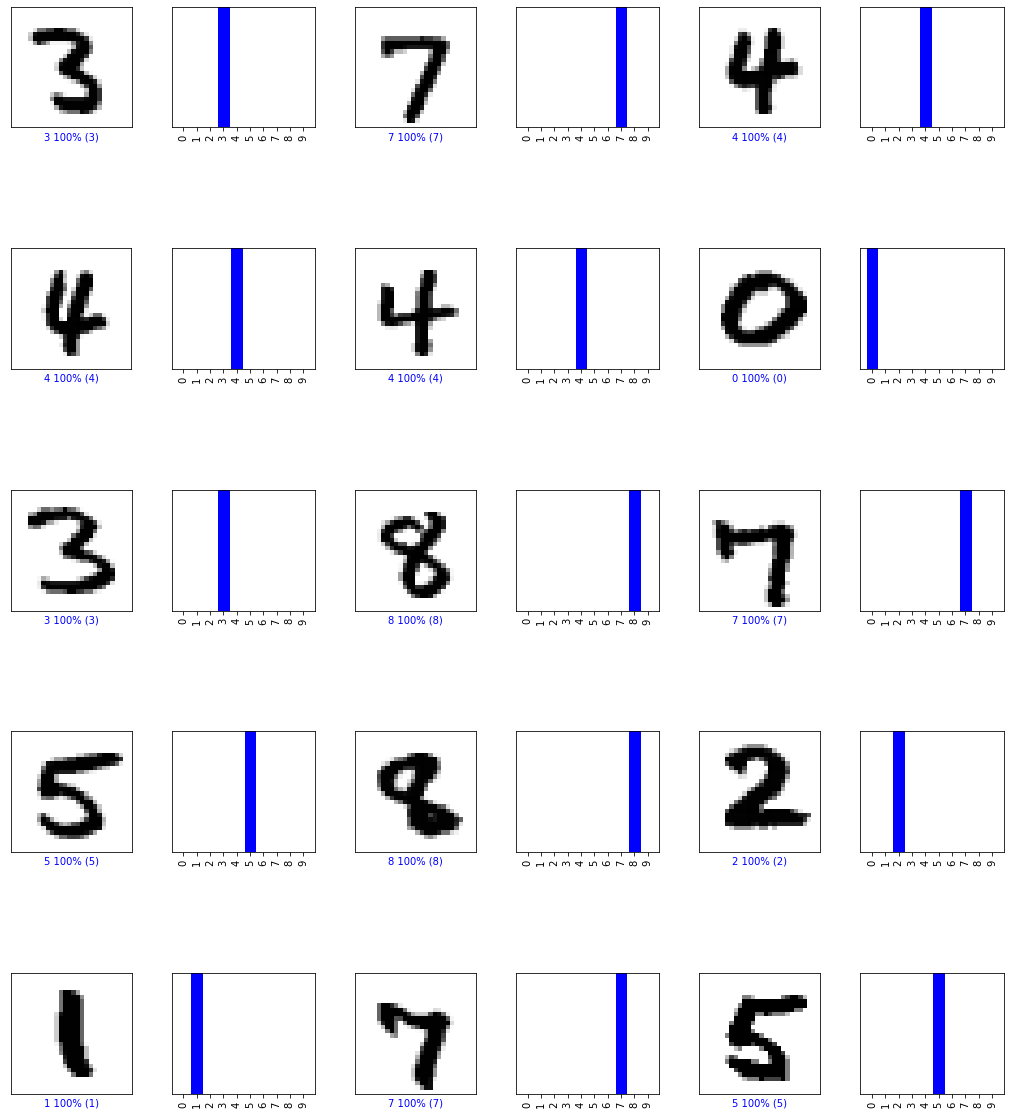

In [27]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

#### 방법 4) only Keras의 Sequential API로 구현

## Importing Libraries

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.2.0-rc3
2.3.0-tf


## Enable Eager Mode

In [0]:
if tf.__version__ < '2.0.0':
    tf.enable_eager_execution()

## Hyper Parameters

In [0]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100
n_class = 10

## MNIST/Fashion MNIST Data

In [0]:
## MNIST Dataset #########################################################
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Datasets

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

In [0]:
n_train = train_images.shape[0]
n_test = test_images.shape[0]

In [0]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
# CNN에 입력으로 넣기 위해 3차원->4차원으로 변경(channel에 1을 추가)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

## Model Function

In [0]:
# only keras만 이용했을때
# Sequential API를 사용하여 model 구성
# 네트워크가 복잡할 수록 이 방법이 제일 무난하다.

def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', 
                                  input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [39]:
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
history = model.fit(train_images, train_labels,
                   epochs=training_epochs, batch_size=batch_size,
                   validation_data=(test_images, test_labels))

Epoch 1/15
600/600 [==============================] - 4s 7ms/step - loss: 0.2039 - accuracy: 0.9360 - val_loss: 0.0632 - val_accuracy: 0.9803
Epoch 2/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0568 - accuracy: 0.9822 - val_loss: 0.0281 - val_accuracy: 0.9914
Epoch 3/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0383 - accuracy: 0.9883 - val_loss: 0.0230 - val_accuracy: 0.9919
Epoch 4/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0241 - val_accuracy: 0.9916
Epoch 5/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.0207 - val_accuracy: 0.9926
Epoch 6/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0235 - val_accuracy: 0.9916
Epoch 7/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0228 - val_accuracy: 0.9923
Epoch 

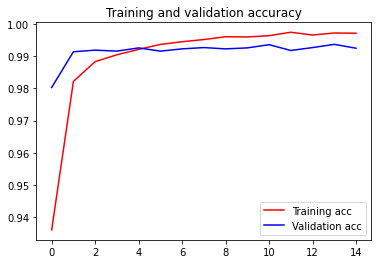

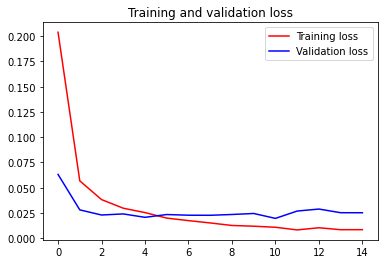

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# With tf.data.Dataset

In [0]:
# 데이터셋을 구성해서 하는 이유는 mnist 같은 경우는 데이터가 상당히 작기 때문에
# numpy array에 통째로 집어넣은 train_images라고 numpy array를 만들어써도  문제가 없지만 
# 실제 데이터같은 경우는 데이터가 너무 커서 다 안들어가는 경우 때문에 그런것이다.

# Dataset 구성 #repeat() 꼭 추가해야함
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [0]:
new_model = create_model()

In [0]:
new_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [46]:
# evaluate는 말그대로 모델의 성능을 측정하는 메서드고
# predict라는 메서드도 있는데 이거는 에큐레시가 안나오고 모델의 출력 결과가 나온다.

new_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.3107 - accuracy: 0.0980


[2.3107240200042725, 0.09799999743700027]

In [47]:
steps_per_epoch = n_train//batch_size
validation_steps = n_test//batch_size
print(steps_per_epoch, validation_steps)

600 100


In [48]:
# steps_per_epoch는 한 에포크당 몇스텝이냐를 넣어줘야 한다. 데이터가 외부에서 공급되기 때문에
# 얼마만큼 돌아야 한 에포크인지 알 수 없다. 그래서 배치가 몇번이 들어오면 한 에포크인지
# 알려줘야 한다. 그거를 앞에 계산한게 있다. 트레이닝 데이터가 6만장이고 배치사이즈가 100
# 이기 때문에 6만을 100으로 나누면 600이다. 그래서 600번 배치가 들어오면 한에포크이다.
# validation_steps도 마찬가지다. 1만장이 테스트 셋이고 배치사이즈가 100이면 100번 배치가
# 들어오면 한 에포크인 것이다.

history = new_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/15
600/600 [==============================] - 5s 8ms/step - loss: 0.2011 - accuracy: 0.9358 - val_loss: 0.0402 - val_accuracy: 0.9877
Epoch 2/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0545 - accuracy: 0.9837 - val_loss: 0.0250 - val_accuracy: 0.9924
Epoch 3/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0358 - val_accuracy: 0.9877
Epoch 4/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0304 - val_accuracy: 0.9894
Epoch 5/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0241 - accuracy: 0.9919 - val_loss: 0.0235 - val_accuracy: 0.9925
Epoch 6/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0210 - val_accuracy: 0.9929
Epoch 7/15
600/600 [==============================] - 5s 8ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0205 - val_accuracy: 0.9929
Epoch 

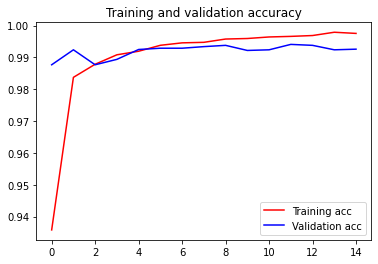

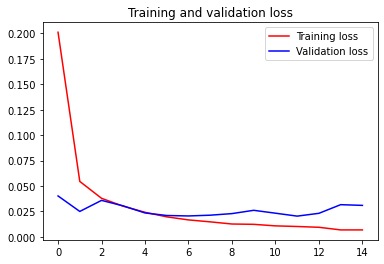

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[:,:,0],cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

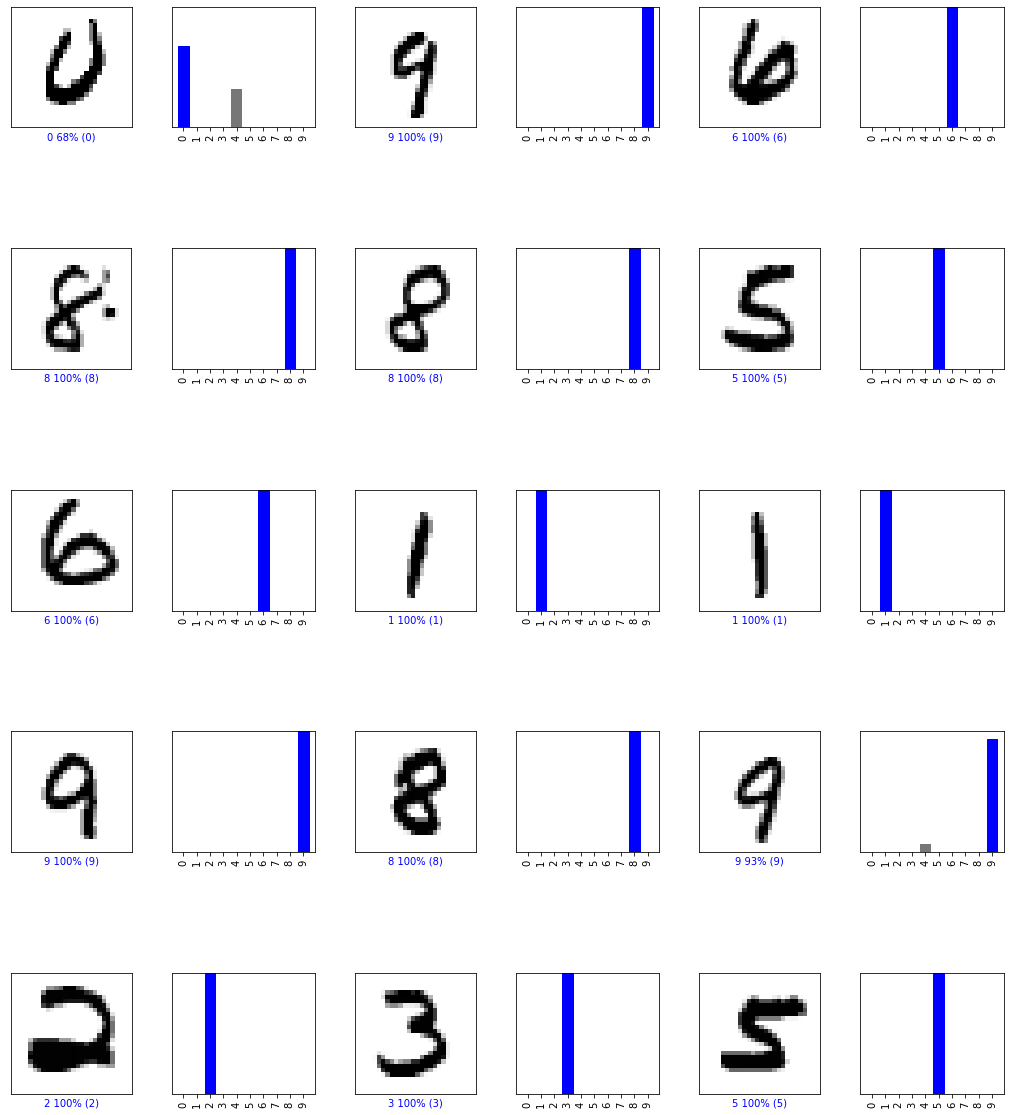

In [51]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Creating a Checkpoint Directory

In [0]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_cnn_keras'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

# Saving Weights

In [0]:
model.save_weights(checkpoint_prefix)

# Calculating Average Accuracy

In [0]:
def avg_accuracy(model, dataset):
    avg_acc = 0.
    step = 0
    for images, labels in dataset:        
        predictions = model(images, training=False)
        correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
        acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))     
        avg_acc += acc
        step += 1    
    avg_acc = avg_acc / step
    return avg_acc.numpy()

# Creating a New Model

In [0]:
new_model2 = create_model()

# Test Accuracy before Restore

In [56]:
avg_accuracy(new_model2, test_dataset)

0.101100005

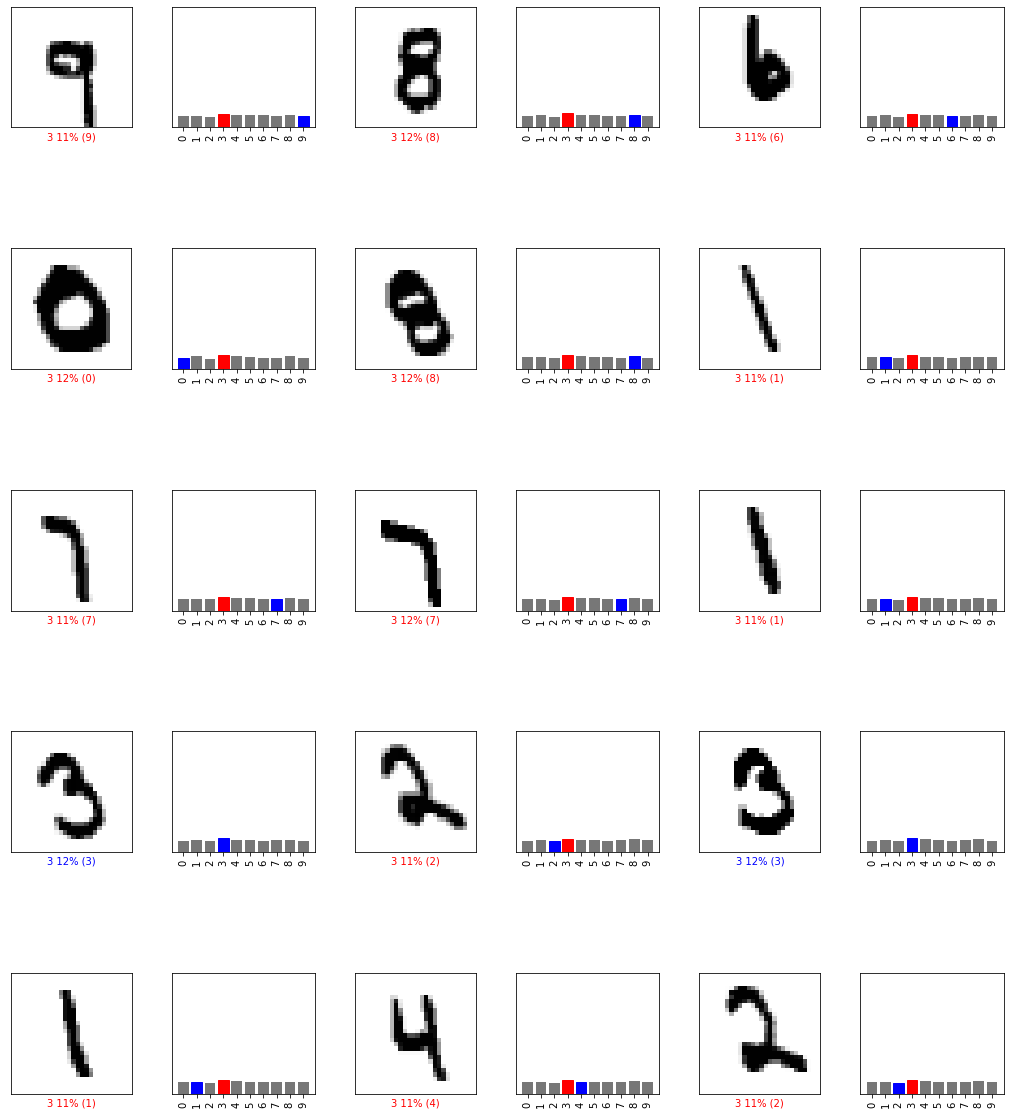

In [57]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model2(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Restore Weights

In [61]:
new_model.load_weights(checkpoint_prefix)

# Test Accuracy after Restore

In [62]:
avg_accuracy(new_model, test_dataset)

0.9925

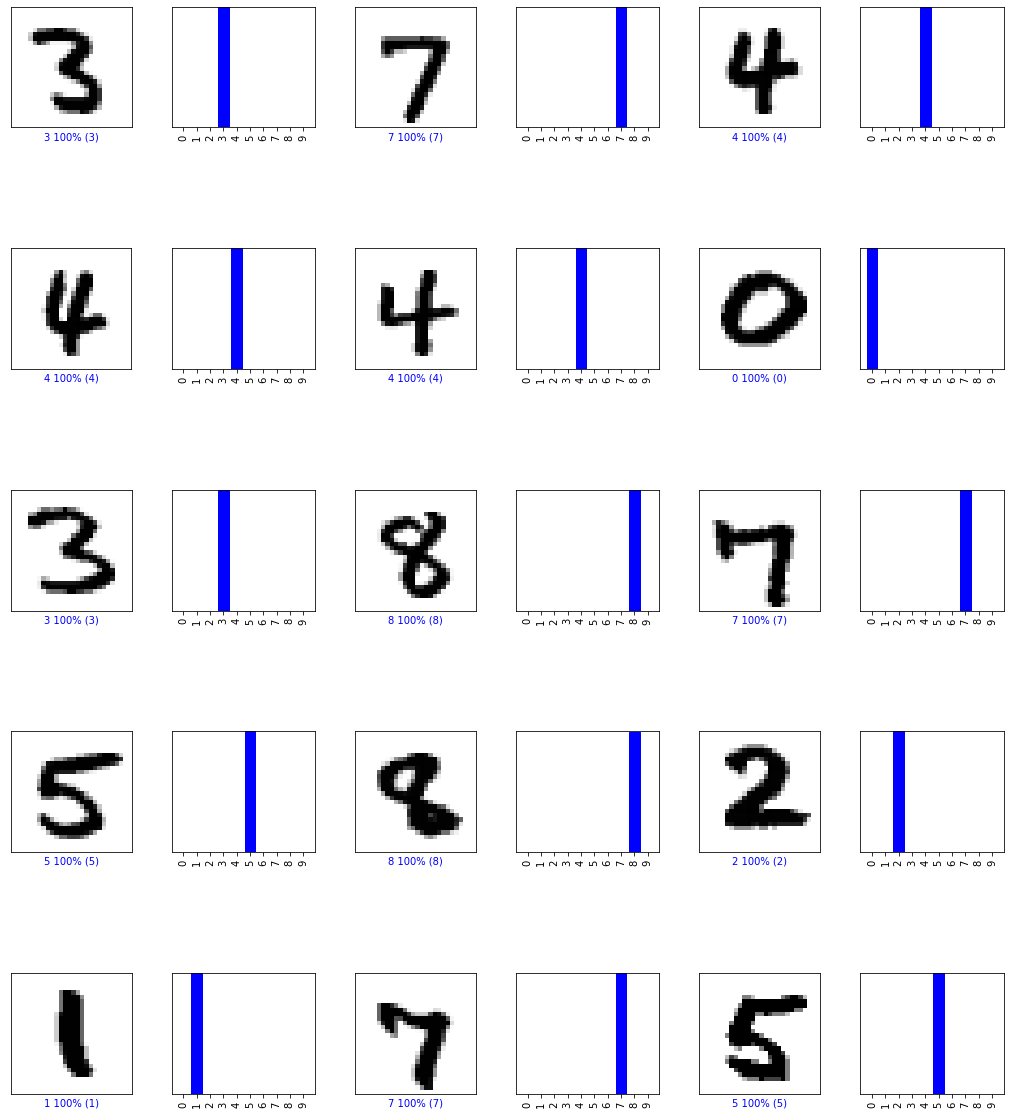

In [64]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break